In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym.envs.registration import register
import time
import os
import main

In [2]:
env = gym.make('MountainCar-v0').env
# env = gym.make('MountainCar-v0', render_mode="human")
env.reset()
env.close()

In [3]:
# maxV = []
# maxP = []
# for i in range(10000):
#     env.render()
#     print(i)
#     observation, reward, done, info, check = env.step(env.action_space.sample())
#     time.sleep(0.03)
#     maxP.append(observation[0])
#     maxV.append(observation[1])
#     if done:
#         env.reset()
#         # print(np.max(maxP), np.max(maxV))
# env.close()

In [4]:
# print(np.max(maxP), np.max(maxV))

In [5]:
# print(np.min(maxP), np.min(maxV))

In [6]:
EPOCHS = 1000
ALPHA = 0.8
GAMMA = 0.9
NO_OF_BINS = 30

epsilon = 1.0
min_epsilon = 0.01
max_epsilon = 1.0
decay_val = 0.0001

In [7]:
def createBins(NO_OF_BINS):
    binPosition = np.linspace(-1.2, 0.6, NO_OF_BINS)
    binVelocity = np.linspace(-0.6, 0.6, NO_OF_BINS)

    return np.array([binPosition, binVelocity])

In [8]:
bins = createBins(NO_OF_BINS)


In [9]:
def discritizeObs(observation, bins):
    binnedObs = []
    for i, obs in enumerate(observation):
        discreetVal = np.digitize(obs, bins[i])
        binnedObs.append(discreetVal)

    return tuple(binnedObs)

In [10]:
qTableShape = (NO_OF_BINS, NO_OF_BINS, env.action_space.n)
qTable = np.zeros(qTableShape)

In [11]:
def egas(epsilon, qTable, discrete_state):
    rn = np.random.random()
    # exploitation
    if rn > epsilon:
        # print(discrete_state)
        # print('Exploit')
        action = np.argmax(qTable[discrete_state])
        # print(action)
    else:
        # print('random')
        action = env.action_space.sample()

    return action


In [12]:
# def punish(done, reward, points):
#     if points < 150 and done:
#         reward -= 150
#
#     return reward

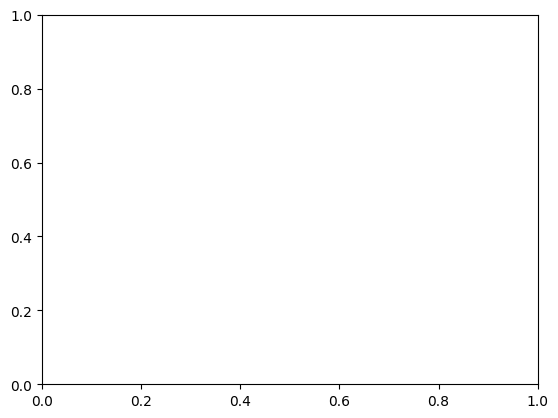

In [13]:
#Visualization
log_interval = 50
render_interval = 10000
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()

points_log = []
avg_mean_points = []
epochs = []
epp = 0

C:\Users\bherw\OneDrive\Desktop\Suraj\Reinforment Learning\gridworld\venv\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


0
0


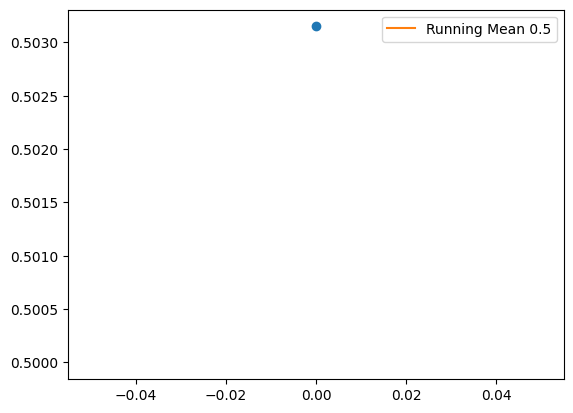

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
50


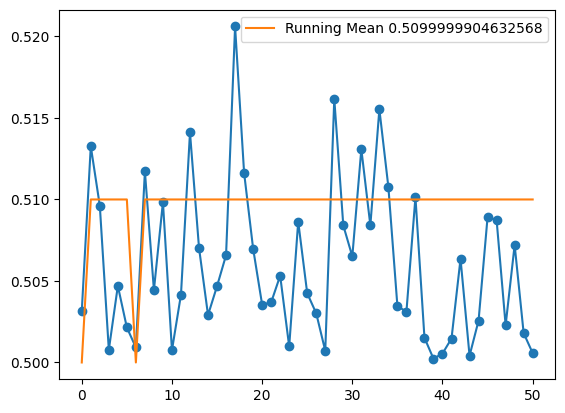

51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93


In [ ]:
for epoch in range(EPOCHS):
    initState = env.reset()
    # print(initState)
    discreetState = discritizeObs(initState[0], bins)
    done = False
    points = 0
    epochs.append(epoch)

    while not done:
        action = egas(epsilon, qTable, discreetState)
        # print(1)
        nextState, reward, done, info, check = env.step(action)
        # print(2)
        # reward = main.punish(done, reward, points)
        # print(reward)
        position, velocity = nextState
        nextDiscreetState = discritizeObs(nextState, bins)
        # print(3)
        oldQVal = qTable[(discreetState)+(action,)]
        # print(4)
        nextOptimalQValue = np.max(qTable[nextDiscreetState])
        # print(5)
        nextQ = main.computeQValue(oldQVal, reward, nextOptimalQValue)
        # print(6)
        qTable[discreetState+(action,)] = nextQ
        # print(7)
        discreetState = nextDiscreetState
        # print(8)
        if position > points:
            points = position

            
        # print("-----------------------------------------------------------------------")



    epsilon = main.newDecay(epsilon, decay_val, epoch)
    points_log.append(points)
    running_mean = round(np.mean(points_log[-30:]), 2)
    avg_mean_points.append(running_mean)
    epp = epoch
    print(epp)

    if epoch % log_interval == 0:
        print(epoch)
        plt.figure().clear()

        plt.scatter(epochs, points_log)
        plt.plot(epochs, points_log)
        plt.plot(epochs, avg_mean_points, label = f"Running Mean {running_mean}")
        plt.legend()
        fig.canvas.draw()
        plt.show()



env.close()